# compute the ICA for denoising

In [ ]:
import sys
import os
import mne
# Add the workspace root to the Python path
mne.set_log_level('WARNING')
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
from functions import preprocess, behaviorAnalysis, get_noisyICs
from Pipeline import pre_gICA, ICA_denoise
ids = [601,602,603,604,605,606]

def ICA_presubject(ids):
    workspace_root = os.path.abspath("..")
    if workspace_root not in sys.path:
        sys.path.append(workspace_root)
    from functions import preprocess, behaviorAnalysis, get_noisyICs
    from Pipeline import pre_gICA, ICA_denoise
    for id in ids:
         ICA_denoise(id, lowPassFilter = 30, n_components=0.98, decim=2, ica_name = 'ica_infomax_LpF', overwrite = False)
    return
# submit with submitit one job 
from submitit import AutoExecutor
executor = AutoExecutor(folder="logdir")
executor.update_parameters(cpus_per_task=4,  mem_gb=14, timeout_min=600)
job = executor.submit(ICA_presubject, ids)

# concatenate clean parts

In [1]:

ids = [601,602,603,604,605,606]
def dummy(ids):
    import sys
    import os
    import mne
    # Add the workspace root to the Python path
    workspace_root = os.path.abspath("..")
    if workspace_root not in sys.path:
        sys.path.append(workspace_root)
    from functions import preprocess, behaviorAnalysis, get_noisyICs
    from Pipeline import pre_gICA, ICA_denoise
    pre_gICA(ids,ica_name = 'ica_infomax_LpF', lowPassFilter_pregICA = 30, noise_type = 'all', file_name = 'groupData_Remall')
    return
# submit with submitit one job
from submitit import AutoExecutor
executor = AutoExecutor(folder="logdir")
executor.update_parameters(cpus_per_task=4,  mem_gb=14, timeout_min=600)
job = executor.submit(dummy, ids)


# gICA

In [1]:
import sys
import os
import mne
# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
path_concat = os.path.join(workspace_root, 'Data', f'groupData_Remall.fif')  
concat_data = mne.io.read_raw_fif(path_concat, preload=True) 
def gICA(concat_data):
    # compute the ICA
    ica = mne.preprocessing.ICA(n_components = 0.98, method= 'infomax', fit_params=dict(extended=True))
    ica.fit(concat_data, picks = 'eeg', decim = 2)
    ICA_path = os.path.join(workspace_root, 'Data', f'gICA_2.fif')
    ica.save(ICA_path, overwrite=True)
    return 

# submit with submitit one job 
from submitit import AutoExecutor
executor = AutoExecutor(folder="logdir")
executor.update_parameters(cpus_per_task=4,  mem_gb=14, timeout_min=600)
job = executor.submit(gICA, concat_data)

Opening raw data file /workspaces/preprocessing_pipline/Data/groupData_Remall.fif...
    Range : 2835 ... 745027 =      5.537 ...  1455.131 secs
Ready.
Reading 0 ... 742192  =      0.000 ...  1449.594 secs...


/tmp/ipykernel_8856/1284565982.py:9: RuntimeWarning: This filename (/workspaces/preprocessing_pipline/Data/groupData_Remall.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  concat_data = mne.io.read_raw_fif(path_concat, preload=True)


# plots

C:\Users\gmoha\AppData\Local\Temp\ipykernel_9104\357396416.py:10: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\groupData_Remall.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  concat_data = mne.io.read_raw_fif(path_concat, preload=True)
C:\Users\gmoha\AppData\Local\Temp\ipykernel_9104\357396416.py:13: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\gICA_2.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica( ICA_path)


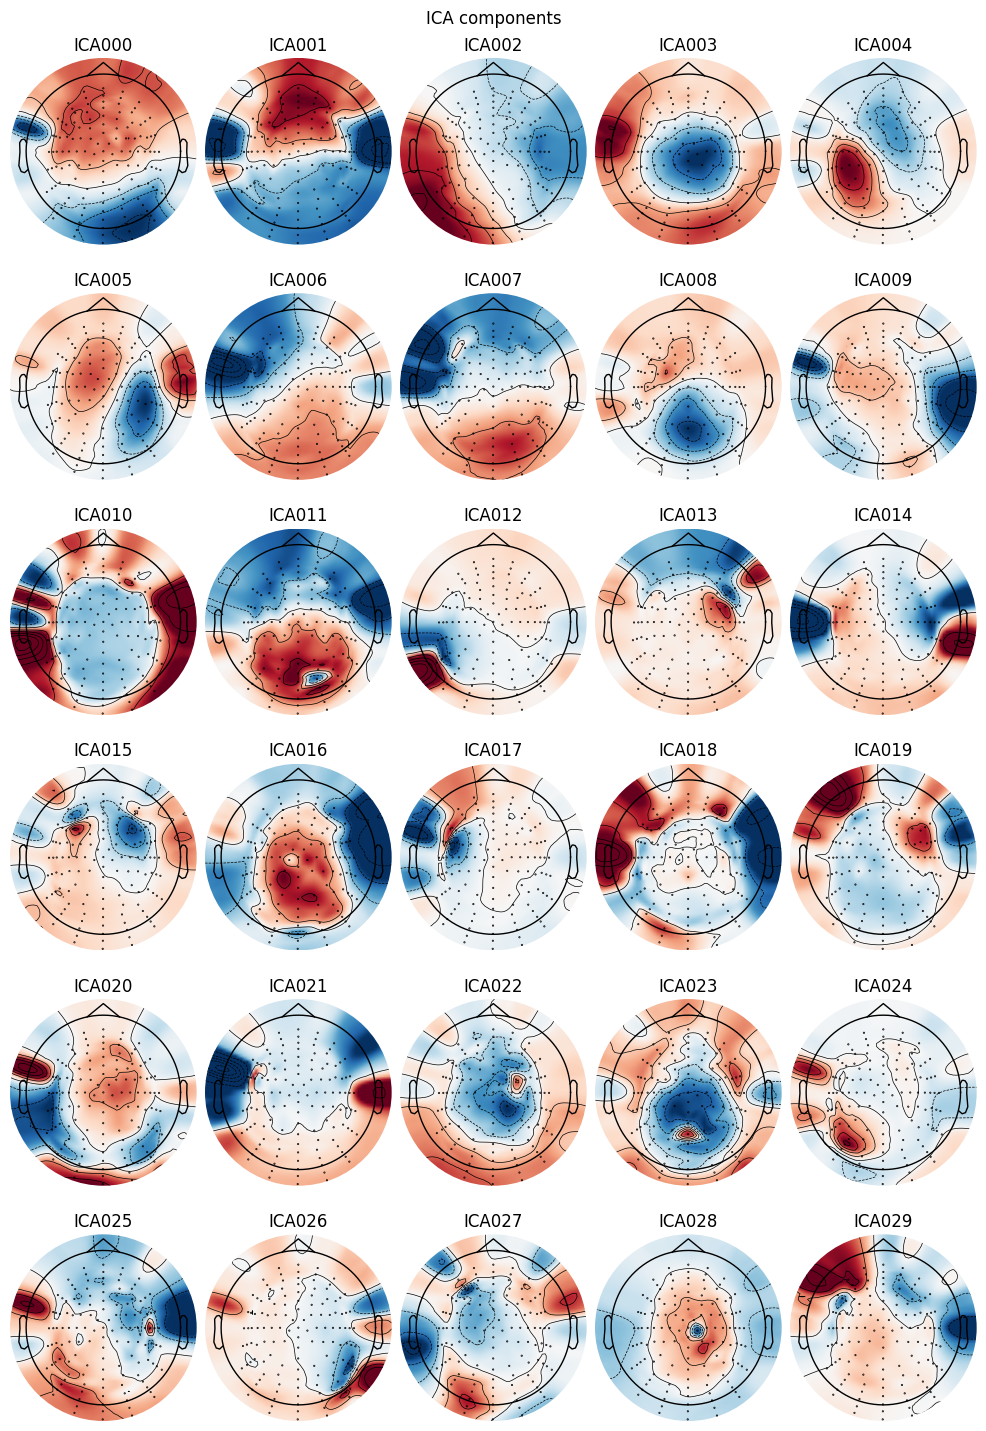

In [6]:
import sys
import os
import mne
# Add the workspace root to the Python path
mne.set_log_level('WARNING')
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
path_concat = os.path.join(workspace_root, 'Data', f'groupData_Remall.fif')  
concat_data = mne.io.read_raw_fif(path_concat, preload=True)
ICA_path = os.path.join(workspace_root, 'Data', f'gICA_2.fif')
%matplotlib qt
ica = mne.preprocessing.read_ica( ICA_path) 
ica.plot_components(inst = concat_data, picks = range(0, 30))